#  <center>  Frekvenčne lastnosti upora, kondenzatorja in tuljave  </center>

<br>
<center>Dejan Križaj, 2019</center>

**Namen:** Zvezek (Notebook) je namenjen seznanjanju študentov z uporabo Jupytra za analizo frekvenčne odvisnosti upora, kondenzatorja in tuljave.

S spoznanji o uporabi kompleksnega računa za analizo vezij vzbujanih z izmeničnimi signali smo pridobili odlično orodje za frekvenčno analizo vezij. Preprosta vezja pa lahko predstavljajo tudi modele za analizo frekvenčnih lastnosti osnovnih elementov vezij kot so upor, tuljava in kondenzator. Tuljava na primer ima poleg induktivnosti tudi ohmsko komponento, pa ne le zaradi upornosti žice pač pa tudi izgub ob uporabi feromagnetnega jedra. Poleg tega na delovanje tuljave pri višjih frekvencah vplivajo tudi medovojne kapacitivnosti. Realna tuljava je torej kompleksen element, ki ga lahko modeliramo kot bolj ali manj ustrezno nadomestno vezje. Podobno velja za kondenzator in upor.

V nadaljevanju bomo obravnavali frekvenčne lastnosti upora, kondenzatorja in tuljave. Potrebno pa je povedati, da so za pravilno uporabo elementov pogosto potrebni še drugi podatki, kot na primer dovoljeno največje tokovno ali napetostno vzbujanje, temperaturne karakteristike in podobno. Kljub temu pa je frekvenčna odvisnost elementa in predvsem analiza izgub pomemben podatek pri načrtovanju vezij.

**Prej bi lahko predelal tudi:**
* O obravnavi vezij vzbujanih z izmeničnimi signali s kompleksnim računom
* O obravnavi resonančnih vezij

<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
<br>    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika. Več podobnih primerov je na Githubu na https://github.com/osnove/Dodatno/
</div>

## Realna tuljava - osnovni model

Noben osnovni element vezij kot so upor, kondenzator ali tuljava, nima v praksi idealnih lastnosti. Tuljava naj bi imela idealno le induktivno komponento, v resnici pa ima tudi ohmsko zaradi upornosti navitja, pa tudi kapacitivnost zaradi med-ovojne kapacitivnosti. Poleg tega ima lahko tuljava vrsto t.i. magnetnih izgub, ki so lahko posledica histereznih izgub feromagnetnega jedra (če ni zračna tuljava) ali izgub zaradi vrtinčnih tokov. 

<img src="https://raw.githubusercontent.com/osnove/Slike/master/newport_1.png" style="height:150px" align="right"> 

Enega od možnih nadomestnih modelov prikazuje  slika na desni. Podatki so povzeti po članku http://www.intusoft.com/articles/inductor.pdf in se nanašajo na 1 mH tuljavo Newport Components 1400 series 1mH inductor (14 105 40) s podatki Lo=1mH, Rdc=0.173, Cp=39.6e-12, Rp=250e3. Poglejmo si, kakšno nadomestno impedanco dobimo z uporabo tega modela:


$\underline Y_{nad} = \frac{1}{R_{dc}+j\omega L}+ j\omega C + 1/R_p$


$\underline Z_{nad} = \frac{1}{\underline Y_{nad}}$





In [13]:
## Vnos potrebnih knjižnic (modulov)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

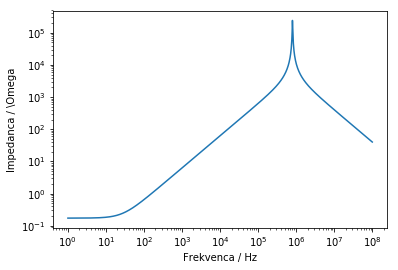

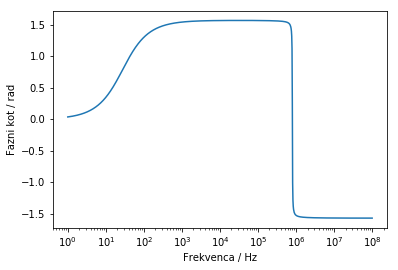

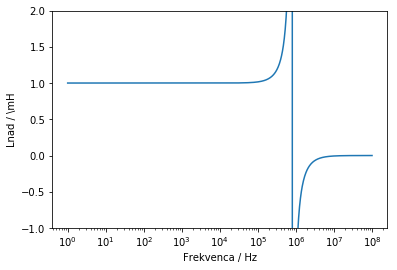

In [14]:
## Nadomestna impedanca realne tuljave
Lo=1e-3
Rdc=0.173
Cp=39.6e-12
Rp=250e3

exponent=np.linspace(0,8,1000)
freq=10**exponent
omega=2*np.pi*freq

Ynad=1/(Rdc+1j*omega*Lo)+1j*omega*Cp+1/Rp
Znad=1/Ynad
Lnad=Znad/(1j*omega)


plt.figure()
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Impedanca / \Omega')
plt.loglog(freq,abs(Znad))
plt.figure()
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Fazni kot / rad')
plt.semilogx(freq,np.angle(Znad))
plt.figure()
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Lnad / \mH')
plt.ylim(-1,2)
plt.semilogx(freq,(Lnad.real)*1e3)


**Ugotovitve:** Frekvenčna karakteristika impedance kaže, da se ta skorajda ne spreminja do 10 kHz, potem pa se linearno veča (v loglog merilu) do cca 400 kHz (slika 1).  Iz poteka faznega kota (slika2) je razvidno, da je ta pri nizkih frekvencah manjši od $\pi/2$ in doseže  $\pi/2$ šele pri frekvenci okoli 1 kHz. V področju nizkih frekvenc prevladuje ohmska komponenta $R_{dc}$, torej upornost ovojev. 
Nad 400 kHz pride do izraza kapacitivnost in tuljava je v resonanci pri cca 1 MHz. Nad to frekvenco prevladuje kapacitivnost, tuljava več ne opravlja svoje "funkcije". 

Boljši vpogled v področje uporabe dobimo, če izrišemo nadomestno induktivnost kot $L_{nad}=\frac{\underline Z}{j\omega}$ v lin-log merilu (slika 3). Ugotovimo, da je ta precej linearna, tudi pri nizkih frekvencah in se pred dosegom resonance celo poveča. Potrebno je še povedati, da je linearnost Lnad pri nizkih frekvencah posledica tega, da izrisujemo le realni del od Lnad, ki "govori" o induktivnem značaju tuljave, s čemer smo izključili prispevek ohmske upornosti. V praksi bi tuljava pri nizkih frekvencah, recimo tja do 100 Hz, bolj slabo delovala oz. bi delovala z relativno velikimi ohmskimi izgubami.

Ali se induktivnost ob bližanju resonančni frekvenci res poveča? Če ne bi bilo vpliva kondenzatorja, tega povečanja ne bi zaznali. Toda, ker je reaktanca določena kot $X_L=\omega L = \frac{U}{I}$, je torej $ L = \frac{U}{\omega I}$. Vzemimo, da vzbujamo tuljavo z napetostnim signalom. Napetost na zunanjih sponkah se tudi ob resonanci ne more povečati, se pa izrazito zmanjša skupni tok (impedanca se zelo poveča), zato se navidezno poveča induktivnost tuljave. Ali to tudi pomeni, da je njen učinek večji? Npr. naredi večje magnetno polje? V bistvu ne. Če tuljavo vzbujamo z napetostnim signalom, je tok skozi ovoje (le ta dela magnetno polje) določen (glede na nadomestni model) z $\underline I_L = \frac{\underline U}{R_{dc}+j\omega L_o}$. Nazivna induktivnost $L_o$ (1 mH) se poveča le navidezno, ker sta tok, ki gre skozi to vejo (ovoje) in tok, ki gre preko parazitne kapacitivnosti (premikalni tok) v protifazi in se torej odštevata. (Tu velja omeniti, da te tokove v osnovi ne moremo preprosto meriti, npr. z Ampermetrom, saj gre le za en element, tri tokovne veje smo narisali le modelno. No, lahko bi eventuelno merili učinek magnetnega polja (če to npr.  ni zaobjetno s feromagnetnim jedrom), ki pa je neposredno odvisen le od toka skozi idealno induktivnost.)

Če bi uporabljali tuljavo za vzpostavitev magnetnega polja in bi želeli, da je to polje enako veliko pri vseh frekvencah, bi morali skladno s potekom impedance z večanjem frekvence povečevati tudi amplitudo vzbujalne napetosti, saj je velikost polja neposredno odvisna od toka skozi ovoje. V bližini resonance bi bile razmere še toliko slabše, saj bi morali vzbujalno napetost še izraziteje povečati.

Kaj pa če bi tuljavo vzbujali s tokovnim izmeničnim virom? Potem bi se v skladu z Ohmovim zakonom $\underline U = \underline I \underline  Z$ zaradi večanja impedance s frekvenco povečevala tudi napetost na sponkah tuljave. Toda tok skozi ovoje bi pri nižjih frekvencah še vedno določala induktivnost tuljave. V bližini resonance pa bi se (ob predpostavki  idealnega tokovnega vira) napetost na sponkah tuljave precej povečala, s tem pa tudi tok skozi ovoje tuljave (v protifazi s tokom preko izgubne kapacitivnosti) in s tem tudi magnetni učinek tuljave.



### Model realne tuljave Coilcraft 33 uH

Polgejmo še model tuljave Coilcraft 33 uH (Coilcraft 0603PS.333K). Proizvajalec predlaga model na sliki, ki vsebujejo tudi elementa $R_{VAR1}$ in $R_{VAR2}$, ki sta frekvenčno odvisna, npr. $R_{VAR1}=k_1 \sqrt f$. Gre za matematični model, ki se dobro prilega izmerjenim rezultatom. 

<img src="https://raw.githubusercontent.com/osnove/Slike/master/coilcraft_SPICE.png" style="height:150px" align="left"> 

https://www.coilcraft.com/pdfs/spice_0603ps.pdf
https://www.coilcraft.com/modelsltpice.cfm


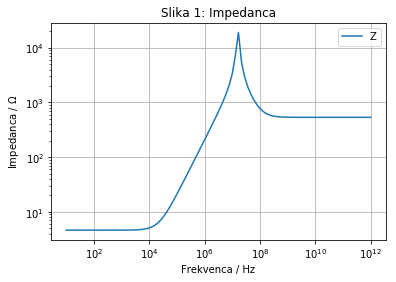

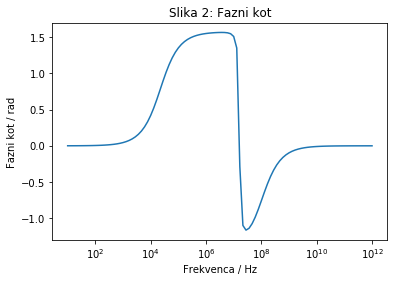

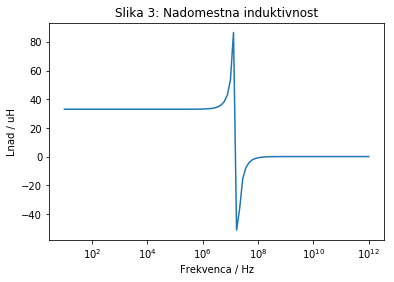

In [15]:
## Model Coilcraft.333K
R1=531
R2=4.66
C=2.98e-12
k1=1.05e-4
k2=15.7
L=33e-6

exponent=np.linspace(1,12,100)
freq=10**exponent
omega=2*np.pi*freq

Rvar1=0 #k1*np.sqrt(freq)
Rvar2=1e10 #k2*np.sqrt(freq)


Y=1/(1j*omega*L+Rvar1)+1/(R1+1/(1j*omega*C))+1/Rvar2
Znad=R2+1/Y
Lnad=Znad/(1j*omega)


plt.figure()
plt.title('Slika 1: Impedanca')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Impedanca / $\Omega$')
plt.loglog(freq,abs(Znad),label='Z')
#plt.loglog(freq,Znad.real,label='ESR')
plt.legend()
plt.grid()
plt.figure()
plt.title('Slika 2: Fazni kot')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Fazni kot / rad')
plt.semilogx(freq,np.angle(Znad))
plt.figure()
plt.title('Slika 3: Nadomestna induktivnost')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Lnad / uH')
#plt.ylim(-100,200)
plt.semilogx(freq,(Lnad*1e6))

**Ugotovitve:** Če primerjamo model Coilcraft tuljave s prejšnjim  modelom, ne vidimo večjih razlik (v obliki poteka, ne v vrednostih, ki so pač drugačne). Tuljava ima induktivne lastnosti relativno konstantne do resonančne frekvence. Model je bolj kompleksen zato, ker želi bolj natančno prikazati ohmske izgube tuljave. Ker poleg ohmske upornosti ovojev na izgube vplivajo tudi histerezne izgube in pri višjih frekvencah tudi vrtinčni tokovi, je model dopolnjen s frekvenčno odvisno upornostjo. 

**Zdaj pa ti:** 
1. Dodaj izrisu impedance še izris realne komponente impedance. (V bistvu le odkomentiraš vrstico). Ta "navidezna" upornost, ki jo imenujemo ekvivalentna serijska upornost ESR, predstavlja vsoto vseh izgub v tuljavi pri izmeničnih signalih. Ugotovimo, da se približa absolutni vrednosti impedance pri nizkih frekvencah in v resonanci. 
2. Bolj pomembna kot sama vrednost ESR je razmerje te komponente proti induktivni upornosti (reaktanci tuljave). Bolj posplošeno je potrebno pogledati razmerje med realnim in imaginarnim delom impedance. To imenujemo tudi faktor izgub ali tangens delta, ki pa ga bolj pogosto uporabljamo pri opisovanju izgub v kondenzatorjih. Pri tuljavah pa bolj pogosto uporabljamo inverzno vrednost faktorja izgub, ki ga imenujemo kvaliteta in je torej definiran kot $Q=\frac{Im[\underline Z]}{Re[\underline Z]}$. Dodaj na koncu slik še eno, na kateri boš prikazoval kvaliteto tuljave. Za preprosto zaporedno RL vezavo bi dobili $Q=\frac{\omega L}{R} $, torej naraščanje kvalitete s frekvenco. Nekaj takega bi morali tudi dobiti na sliki.

## Realni kondenzator

Slika prikazuje model (enega od možnih) realnega kondenzatorja. C predstavlja idealno kapacitivnost kondenzatorja, Rs serijsko upornost, Rp vzporedno upornost, Cd in Rd t.i. izgube dielektrične absorpcije in Ls induktivnost. Več pojasnil o pomenu posameznih elementov je v obravnavi modela konkretnega keramičnega kondezatorja Murata v nadaljevanju. Tu le izrišimo impedanco in ugotavljamo vpliv osnovnih elementov na odziv vezja. 


<img src="https://raw.githubusercontent.com/osnove/Slike/master/model_kondenzatorja.PNG" style="height:150px" align="left"> 



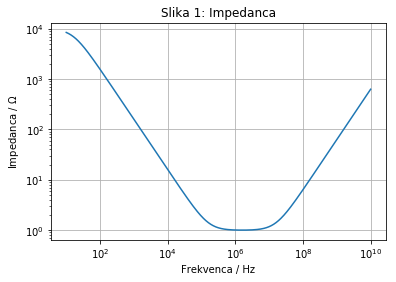

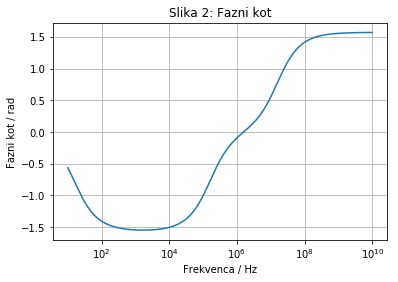

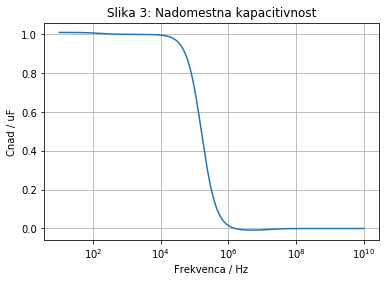

In [16]:
## Nadomestni model kondenzatorja
C=1e-6
L=1e-8
Rs=1
Rp=1e4
Rd=1e5
Cd=1e-8

exponent=np.linspace(1,10,500)
freq=10**exponent
omega=2*np.pi*freq

Y=1j*omega*C+1/Rp +1/(Rd+1/(1j*omega*Cd))
Znad=1j*omega*L+1/Y+Rs 
Cnad=1/(1j*omega*Znad)

plt.figure()
plt.title('Slika 1: Impedanca')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Impedanca / $\Omega$')
plt.loglog(freq,abs(Znad),label='Z')
plt.grid()
plt.figure()
plt.title('Slika 2: Fazni kot')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Fazni kot / rad')
plt.grid()
plt.semilogx(freq,np.angle(Znad))
plt.figure()
plt.title('Slika 3: Nadomestna kapacitivnost')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Cnad / uF')
plt.grid()
plt.semilogx(freq,(Cnad*1e6))



**Ugotovitve:** Impedanca pada s frekvenco do resonančne frekvence, kar je pričakovano, saj razmere (v grobem) diktira impedanca kondezatorja $\underline Z_C = \frac{1}{j\omega C}$. Da pri nizkih frekvencah prevladuje kapacitivnost, priča tudi potek faznega kota, ki pa se začne "lomiti" že pri frekvenci 10 kHz. Od te frekvence dalje imajo večji vpliv na impedanco uporovne lastnosti  Rp in Rs, hkrati pa se veča tudi prispevek induktivne komponente. Ta začne prevladovati nad resonančno frekvenco 1 MHz.


**Zdaj pa ti**: Zanimivo je opazovati vpliv posameznih komponent nadomestne impedance. To lahko storiš na dva načina: lahko povečaš ali zmanjšaš vrednosti posameznih komponent (npr. Rp je lahko neka zelo velika vrednost ali Rs=0) in tako izločiš njihov vpliv. Lahko pa zakomentiraš del izraza za nadomestno impedanco in ugotavljaš spremembe. Še bolje pa narediš, če skopiraš enačbo in jo poenostavljeno primerjaš z originalno, pri čemer moraš seveda dodati še dodatni izris.
Npr:
1. Zmanjšaj Rs na 0.1 in ugotavljaj spremembe 
2. Povečaj ali zmanjšaj Rp in ugotavljaj spremembe
3. Spremeni Ls in ugotovi spremembe.



### Realni kondenzator - Murata 100 pF, keramični
Vzemimo za primer klasični keramični kondenzator Murata 100 pF,500 V : DE1B3RA101KA4BQ01F
https://psearch.en.murata.com/capacitor/product/DE1B3RA101KA4BQ01F.html
Proizvajalci dandanes že standarno ponujajo t.i. SPICE modele za vse elektronske elemente. Tudi "preproste" kondenzatorje. Ti modeli so načeloma namenjeni za bolj natančne simulacije s programi za simulacijo vezij (npr. LTSPICE, PSPICE). Iz strukture SPICE modela vidimo, kako so med seboj elementi povezani. Na primer, nadomestno vezje analiziranega kondenzatorja je sestavljeno iz: kondenzatorja C1 (od sponke port1 do 11) kateremu je zaporedno vezana tuljava L2 (od 11 do 12) in upor R3 (od 12 do 13), nato pa sta med sponkama 13 in 14 tako C4 kot R4 (vezana vzporedno), nato C5 in R5 vezana vzporedno itd. Na koncu modela je še R100 port1 11 1.00e+10, kar pomeni, da mora biti upor R100 vezan vzporedno z C1.    

C1 port1 11 1.05e-10 <br>
L2 11 12 1.16e-8 <br>
R3 12 13 1.25 <br>
C4 13 14 6.89e-10 <br>
R4 13 14 807 <br>
C5 14 15 7.56e-9 <br>
R5 14 15 7.36 <br>
C6 15 16 8.10e-10 <br>
R6 15 16 2.07 <br>
C7 16 17 4.77e-9 <br>
R7 16 17 1.85 <br>
C8 17 port2 6.62e-11 <br>
L8 17 port2 1.55e-10 <br>
R8 17 port2 4.80 <br>
R100 port1 11 1.00e+10

Celotni nadomestni model kodenzatorja je

$\underline Z_{nad}=\underline Z_{C1}||R_{100}+\underline Z_{L2}+R_3+\underline Z_{C4}||R_4+\underline Z_{C5}||R_5+\underline Z_{C6}||R_6+\underline Z_{C7}||R_7+\underline Z_{C8}||\underline Z_{L8}||R_8$

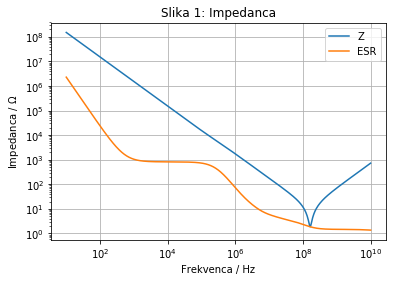

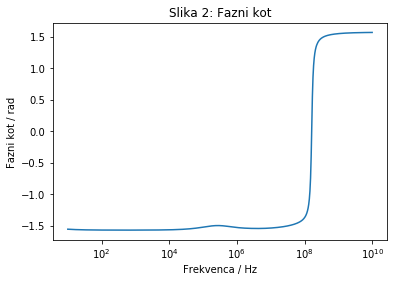

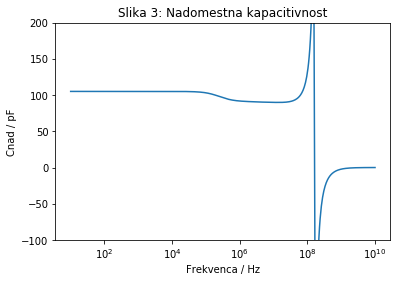

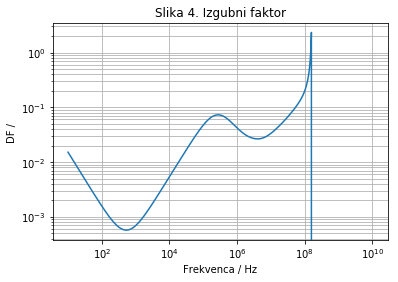

In [17]:
## Model keramičnega kondenzatorja Murata
C1 =1.05e-10
L2 =1.16e-8
R3 =1.25
C4 =6.89e-10
R4=807
C5=7.56e-9
R5 = 7.36
C6 = 8.10e-10
R6 = 2.07
C7 =4.77e-9
R7 = 1.85
C8 = 6.62e-11
L8 = 1.55e-10
R8 = 4.80
R100 = 1.00e+10

exponent=np.linspace(1,10,500)
freq=10**exponent
omega=2*np.pi*freq

Znad=1/(1j*omega*C1+1/R100)+1j*omega*L2+R3 +1/(1j*omega*C4+1/R4) +1/(1j*omega*C5+1/R5)+1/(1j*omega*C6+1/R6)+1/(1j*omega*C7+1/R7)+1/(1j*omega*C8+1/(1j*omega*L8)+R8)


Cnad=1/(1j*omega*Znad)


plt.figure()
plt.title('Slika 1: Impedanca')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Impedanca / $\Omega$')
plt.loglog(freq,abs(Znad),label='Z')
#plt.loglog(freq,abs(Znad2),label='Z')
plt.loglog(freq,(Znad.real),label='ESR')
plt.legend()
plt.grid()
plt.figure()
plt.title('Slika 2: Fazni kot')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Fazni kot / rad')
plt.semilogx(freq,np.angle(Znad))
plt.figure()
plt.title('Slika 3: Nadomestna kapacitivnost')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Cnad / pF')
plt.ylim(-100,200)
plt.semilogx(freq,(Cnad*1e12))

plt.figure()
plt.title('Slika 4. Izgubni faktor')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('DF / ')
plt.grid(True, which="both")
plt.loglog(freq,Znad.real/(-Znad.imag),label='Z')



**Ugotovitve:** Po pričakovanjih je impedanca velika pri nizkih frekvencah in pada linearno (v loglog merilu) do frekvence, kjer se začno pojavljati vplivi induktivnosti (slika 1). Da deluje element kot kondenzator v širokem frekvenčnem prostoru nam priča tudi slika faznega kota (slika 2). Vrednost kapacitivnosti prikazuje slika 3, nekoliko se zmanjša za frekvence nad 100 kHz. 

Slika 4 potrebuje nekaj dodatne razlage. Namreč, na sliki 1 smo dodali še izris ESR (equivalent series resistance), ki predstavlja t.i. ekvivalentno serijsko upornost, ki je definirana kot realni del impedance. Ta deluje nenavadno velika, še posebno pri nizkih frekvencah. ESR je posledica več dejavnikov, tudi upornosti žice in kontaktov vendar glavni del predstavljajo "izgube" znotraj dielektrika. Te so lahko posledica več pojavov. Predvsem noben dielektrik ni idealen izolator, torej ima poleg dielektričnosti tudi neko "izgubno" upornost. Poleg tega prihaja pri vzbujanju dielektrika z izmeničnimi signali v dielektriku do kompleksnih pojavov ob "obračanju" dipolov kot posledica polarizacije dielektrika. To "obračanje" dipolov povzroča večjo dielektričnost materiala in s tem večjo kapacitivnost, hkrati pa se pri tem procesu pojavijo tudi ohmske izgube. Te izgube so lahko zelo frekvenčno odvisne zaradi različnih procesov relaksacije dipolov (molekul) znotraj dielektrika. Kljub temu, da je ESR neobičajno velik pri nizkih frekvencah, je potrebno pogledati kolikšna je ta upornost relativno glede na reaktanco kondenzatorja. Temu razmerju rečemo izgubni faktor ali s tujko faktor disipacije. V splošnem je izgubni faktor definiran kot razmerje med "izgubno" energijo proti energiji shranjeni v polju. Za izmenične signale torej $DF = \frac{1/2I^2 Re[\underline Z]}{1/2I^2 Im[\underline Z]}=\frac{Re[\underline Z]}{ Im[\underline Z]}$. Za preprost model zaporedne vezave upora (ESR) in kondenzatorja, bi bil $DF=\frac{R}{1/\omega C}= R \omega C$. Na sliki 4 vidimo, da DF linearno narašča le v določenem frekvenčnem področju, kar samo pomeni, da je zaporedna vezava upora in kodenzatorja nekoliko poenostavljen model realnega kondenzatorja. Poleg tega vidimo, da DF ni največji pri najnižjih frekvencah pač pa se frekvenčno zelo spreminja. Ugotovimo torej, da zaporedna vezava upora, kondenzatorja in tuljave dokaj dobro opiše nadomestno impedanco kondenzatorja vendar ni dovolj dober model, če želimo upoštevati izgube pri različnih frekvencah.    

https://www.metcaps.com/mci%20web%20docs/DISSIPATION%20FACTOR%20OF%20CERAMIC%20CAPACITORS.pdf

https://web.archive.org/web/20130916071935/http://lowesr.com/QT_LowESR.pdf

**Še to**: 
* Če bi pozorno pogledali stran od proizvajalca (link v prejšnji celici), bi ugotovili, da prikazuje impedanco in ostale vrednosti le od frekvence 1 MHz dalje, kar nakazuje, da pričakuje uporabo tega kondenzatorja pri višjih frekvencah. Poleg tega proizvajalci v katalogu napišejo low ESR ali pa DF=0.025, kar pa je merjeno pri eni frekvenci, običjano 1 MHz. 
* Izgubni faktor včasih imenujemo tudi tangens delta ali izgubni kot ($\tan \delta$), saj to tudi v resnici je. 
* Obratna vrednost od DF je kvaliteta: $Q=1/DF$. Večja, kot je kvaliteta, boljše je (seveda). Kvaliteta okoli 40 je kar solidna vrednost za keramični kondenzator. V bolj zahtevnih aplikacijah je potrebno uporabiti t.i. Hi-Q ali very low ESR kondenzatorje.

**Zdaj pa ti:** 

1) Ugotavljaj vpliv posameznih parametrov (elementov) modela na izračun. To narediš tako, da ohraniš in skopiraš enačbo za izračun nadomestne induktivnosti, potem pa dodajaš (odkomentiraš #) določene dele enačbe in ugotavljaš razlike.
* ohrani le prve tri člene torej enačbo do R3 in poglej rezultat. Ugotovil boš, da se potek impedance ni kaj dosti spremenil. Nekoliko se je zamaknila resonančna frekvenca, kapacitivnost je bolj konstantna v področju do resonance. Bolj izrazite spremembe so v poteku ESR, ki ima sedaj mnogo bolj preprosto obliko. Pada do neke frekvence in potem je naprej konstanten. Kako to razložimo? To je vpliv upora R100, ki je vzporedno vezan (nazivnemu) kondenzatorju C1. Zaradi vzporedne vezave realni del impedance (kar je ESR) vključuje tudi vpliv kapacitivnosti, saj velja $Z_{R|C} = \frac{1}{1/R+j\omega C} = \frac{R}{1+j\omega RC}=\frac{R(1-j\omega RC)}{1+(\omega RC)^2}$. V tem primeru je $ESR=\frac{R}{1+(\omega RC)^2}$ in če mu dodamo še upor R3 dobimo pravo enačbo, ki se izrisuje $ESR=\frac{R}{1+(\omega RC)^2}+R_3$. Za majhne frekvence ta enačba v logaritemskem merilu predstavlja linearno padanje ESR, kot vidimo na sliki, pri večjih frekvencah pa prevladuje R3. R100 torej modelno predstavlja večinoma ohmske izgube zaradi (končne) upornosti dielektrika. Da so te ključne pri nizkih frekvencah ugotoviš tudi tako, da nastaviš R100 na zelo veliko vrednost -  potem bo ostal le še R3. Vsi ostali upori in kondenzatorji v modelu (od R3 dalje) torej predstavljajo dodatne dielektrične izgube zaradi t.i. dielektrične absorpcije.

* Nastavi R100 na zelo veliko vrednost in preveri, če dobiš to, kar smo predvideli v prejšnji vrstici.

2) Dodaj na koncu slik še eno, na kateri prikaži kvaliteto $Q$. Oceni ali kondenzator izpolnjuje kriterije za solidno kvaliteto.

3) Če imaš veselje, poišči sam na spletu kakšno nadomestno vezje za kondenzator (ali drug element), morda najlažje z analizo SPICE modela, in ga analiziraj.


## Realni upor

Tudi vrednost upornosti upora se lahko spreminja s frekvenco. Te informacije so pomembne predvsem pri uporabi preciznih uporov. Za primer vzemimo precizni upor Vishay iz tankega filma, model 2012, ki ima nadomestno vezje kot kaže slika.


<img src="https://raw.githubusercontent.com/osnove/Slike/master/Vishay_resistor_model.PNG" style="height:150px" align="left">


https://www.vishay.com/docs/60107/freqresp.pdf


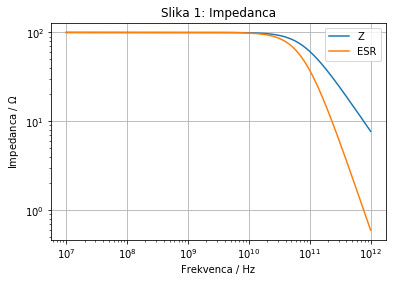

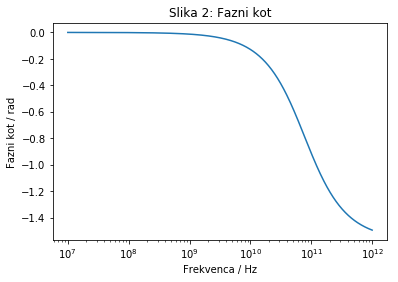

In [18]:
## Vishay upor 2012
C=0.0206e-12
L=1.73e-5*1e-9 #(nH)
R=100
Ls=4e-9 

exponent=np.linspace(7,12,500)
freq=10**exponent
omega=2*np.pi*freq

Ynad=1/(R+1j*omega*L)+1j*omega*C
Znad=1/Ynad 
Znad2=1/Ynad  +1j*omega*Ls

plt.figure()
plt.title('Slika 1: Impedanca')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Impedanca / $\Omega$')
plt.loglog(freq,abs(Znad),label='Z')
#plt.loglog(freq,abs(Znad2),label='Znad2')
plt.loglog(freq,(Znad.real),label='ESR')
plt.legend()
plt.grid()
plt.figure()
plt.title('Slika 2: Fazni kot')
plt.xlabel('Frekvenca / Hz')
plt.ylabel('Fazni kot / rad')
plt.semilogx(freq,np.angle(Znad))

**Ugotovitve:** rezultat ni ravno razburljiv. Kaže, da se obravnavani upor lahko uporabi do zelo visokih frekvenc. V konkretnem primeru do 10 GHz. Nad to frekvenco začne prevladovati kapacitivni efekt. Pri drugih uporih lahko prevladuje tudi induktivni efekt. Poleg tega smo analizirali primer zelo dobrega upora. Za "povprečen upor" je frekvenčna meja precej nižja, glej npr. https://www.edn.com/design/components-and-packaging/4423492/Resistors-aren-t-resistors. 

No, po svoje je rezultat vseeno zanimiv. Namreč, merjenje impedance do tako visokih frekvenc ni ravno enostavna zadeva. Predvsem se pri frekvencah nad nekaj 10 MHz ne da uporabljati več običajne merilnike impedance (včasih rečemo LCR meter) pač pa je potrebno uporabiti drugačne inštrumente. Najpogosteje tako imenovan vektorski analizator vezij (vector network analyser), ki v vezje (element) pošlje ustrezen signal (pulz) in izmeri odboj signala (reflectance) od elementa ter prehod signala skozi element (transmission). Iz analize določi t.i. S parametre, ki so merodajni pri uporabi elementov pri visokih frekvencah.

Če bi analizirali povzeti članek, bi ugotovili, da so v Vischay (znan proizvajalec elektronskih komponent) oziroma firmi Modelitics, ki je specializirana za opravljanje visokofrekvenčnih meritev, zelo skrbno pripravili vzorec upora. Tega so naspajkali na poseben substrat iz kvarčnega stekla itd. Če natančno pogledamo nadomestno shemo ugotovimo, da v njej nastopajo tudi elementi Lc in Cg, ki predstavljata t.i. parazitne elemente. Če si sposodimo sliko iz seminarja TI (Texas Instruments) o tehnikah izdelave PCB vezij za visoke frekvence https://www.ti.com/lit/ml/slyp173/slyp173.pdf, ugotovimo, da vsaka preprosta linija na PCB-ju predstavlja parazitno kapacitivnost in induktivnost, ki je 0.8 pF/cm in 4 nH/cm za konkentni primer oblike linije in dielektričnih lastnosti in debeline substrata. Če pogledamo vrednosti nadomestne kapacitivnosti in induktivnosti v modelu, ugotovimo, da je recimo nadomestna induktivnost 1.7e-14 H torej ekvivalentna dolžini linije 40 nm ?! Pri čemer je dolžina samega analiziranega elementa 0.51 mm. 1 cm linije na PCBju (ali tudi manj) lahko precej spremenijo razmere, kar lahko preveriš tudi sam z modelom. Visokofrekvenčne razmere je potrebno torej obravnavati drugače kot nizkofrekvenčne, saj je pri visokih frekvencah potrebno upoštevati lastnosti elektromagnetnega polja, na katerega pa zelo vpliva tudi okolica elementa in ne le element sam.  

<img src="https://raw.githubusercontent.com/osnove/Slike/master/TI_hf.png" style="height:250px"  >


# Zaključek

V tem zvezku smo spoznali način analize frekvenčne odvisnosti realnih elementov vezij (upora, kondenzatorja, tuljave) s pomočjo modelov nadomestne impedance, ki se odraža v različnih konfiguracijah vezij z R, L, C elementi, lahko pa tudi s čisto matematičnimi funkcijami, ki odražajo določene frekvenčne lastnosti. Na ta način v bistvu modeliramo vpliv električnega in magnetnega polja na tokovno/napetostno karakteristiko elementa. 

Proizvajalci elementov pogosto podajajo nadomestno impedanco vezja v obliki t.i. SPICE modelov, ki so namenjeni za neposredni vnos v programe za simulacijo vezij, ki jo pogosto tudi imenujemo SPICE simulacija. Iz SPICE modela se da razbrati vezavo in vrednosti nadomestnih elementov vezja. 

Tipično se izkaže, da je vsak element v bistvu neko resonančno vezje in da do resonančne frekvence deluje kot predvideno, nad to frekvenco pa se element obnaša ravno nasprotno, kondenzator kot tuljava in tuljava kot kondenzator.

Poleg osnovne lastnosti elementa, torej, v katerem frekvenčnem območju lahko pričakujemo primerno delovanje, so za uporabo elementov v praksi pomembne tudi njihove izgubne lastnosti. Te opisujemo na več načinov, lahko s pojmom ekvivalentne serijske upornosti (ESR), še bolj pomembno pa je razmerje med izgubno in "koristno" energijo, ki se izraža z razmerjem med realnim in imaginarnim delom impedance. To imenujemo izgubni faktor ali s tujko faktor disipacije (DF), pogosto pa uporabljamo tudi pojem kvalitete (Q), ki je obratna vrednost od izgubnega faktorja. Ta je odvisen od mnogih faktorjev, predvsem od uporabljenih materialov. Je pa tako, da element ima lahko zelo majhen izgubni faktor, pa ima slabe temperaturne lastnosti, nizko dovoljeno napetost, itd. Zato imamo v praksi zelo veliko izbiro elementov, ki imajo lahko isto nominalno vrednost, a zelo različne karakteristike, tudi frekvenčne. 

**Naslednje branje:** Filtri